In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import h5py

from PIL import Image


In [4]:
train_data = h5py.File("train_catvnoncat.h5", 'r')
test_data = h5py.File("test_catvnoncat.h5", 'r')

In [5]:
train_data.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [8]:
x_train = train_data.get('train_set_x')
y_train = train_data.get('train_set_y')

classes = train_data.get('list_classes')

x_test = test_data.get('test_set_x')
y_test = test_data.get('test_set_y')

In [10]:
print('Training Data: ', x_train.shape)
print('Testing Data: ', x_test.shape)

Training Data:  (209, 64, 64, 3)
Testing Data:  (50, 64, 64, 3)


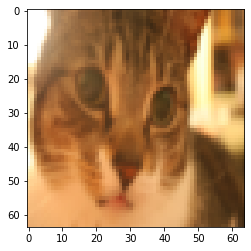

In [19]:
plt.imshow(x_train[200]);


In [20]:
model = tf.keras.Sequential()

In [21]:
model.add(tf.keras.layers.Flatten(input_shape = x_train.shape[1:]))

In [22]:
x_train.shape[1:]

(64, 64, 3)

In [23]:
model.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [24]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 86023     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 86,031
Trainable params: 86,031
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.03),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [28]:
X = np.array(x_train)/255
Y = np.array(y_train)

In [29]:
history = model.fit(X, Y, epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 6ms/step - loss: 30.1563 - accuracy: 0.5050
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.6639
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 0.6779
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.6358
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6687
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6438 - accuracy: 0.6641
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6417 - accuracy: 0.6615
Epoch 8/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.6282
Epoch 9/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6419
Epoch 10/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6128
Epoch 11/500
7/7 [==========

In [31]:
model.evaluate(np.array(x_test), np.array(y_test))

2/2 [==============================] - 0s 10ms/step - loss: 0.8441 - accuracy: 0.3400


[0.8440614938735962, 0.3400000035762787]

In [33]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape = x_train.shape[1:]))


In [34]:
model2.add(tf.keras.layers.Dense(units=20, activation='relu'))
model2.add(tf.keras.layers.Dense(units=12, activation='relu'))
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [35]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.03),
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [36]:
model2.fit(X, Y, epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 6ms/step - loss: 26.0983 - accuracy: 0.5030
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 13.6142 - accuracy: 0.4915
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 3.7823 - accuracy: 0.4886
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 1.9933 - accuracy: 0.5812
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6546 - accuracy: 0.5326
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1091 - accuracy: 0.5466
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6462 - accuracy: 0.6650
Epoch 8/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7278 - accuracy: 0.6082
Epoch 9/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5935 - accuracy: 0.6560
Epoch 10/500
7/7 [==============================] - 0s 24ms/step - loss: 0.5626 - accuracy: 0.7163
Epoch 11/500
7/7 [========

In [37]:
model2.evaluate(np.array(x_test), np.array(y_test))

2/2 [==============================] - 0s 8ms/step - loss: 0.8315 - accuracy: 0.3400


[0.8315407633781433, 0.3400000035762787]